Setup and load all the sheets as a single data frame.

In [2]:
!pip install -r ../requirements.txt
import visualising_poetry as vp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
vp.setup_if_needed()
df = vp.pickle_as_single_data_frame()

##Total number of poems per publications

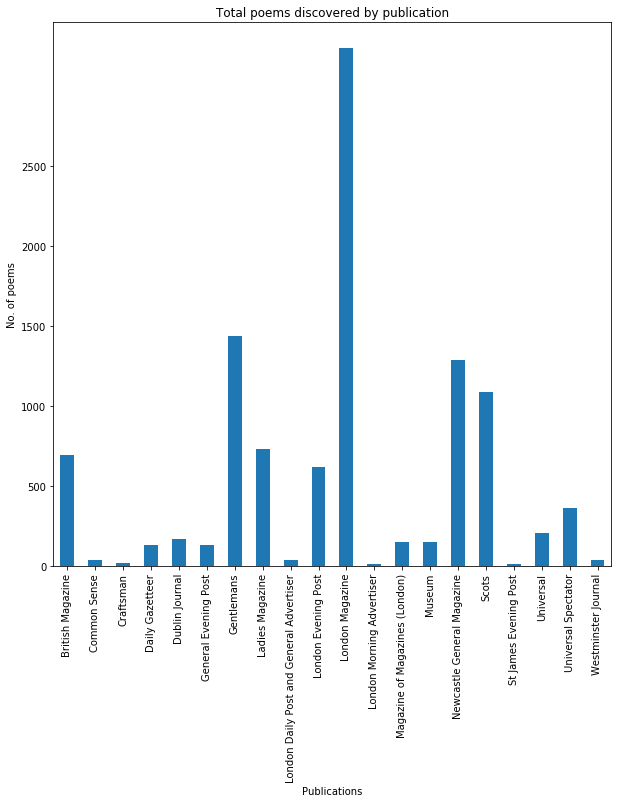

In [3]:
total = df.groupby('publication title')['first line'].size()
total.plot(kind='bar', title="Total poems discovered by publication", figsize=(10,10), yticks=np.arange(0,3000,500))
plot.xlabel("Publications")
plot.ylabel("No. of poems")
plot.show()

##Total number of identified poems by year

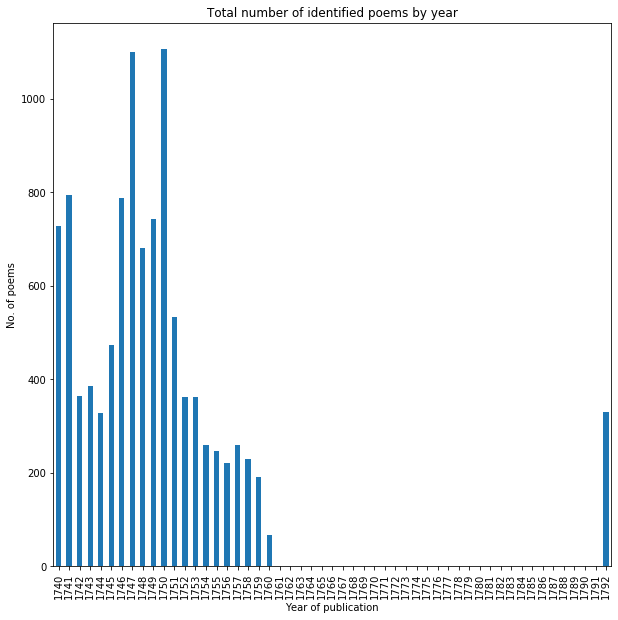

In [4]:
# counts the poems by year
total_by_year = df.groupby('year')['first line'].size()

# get the date range of the data set
start_year = vp.pickle_as_single_data_frame()['year'].min()
end_year = vp.pickle_as_single_data_frame()['year'].max()

# reindex the results to include years not covered
total_by_year_updated = total_by_year.reindex(np.arange(start_year, end_year + 1, 1))

# generate a plot
total_by_year_updated.plot(kind='bar', title="Total number of identified poems by year", figsize=(10,10))
plot.xlabel("Year of publication")
plot.ylabel("No. of poems")
plot.show()

## Total number of identified poems (and duplicates) by year

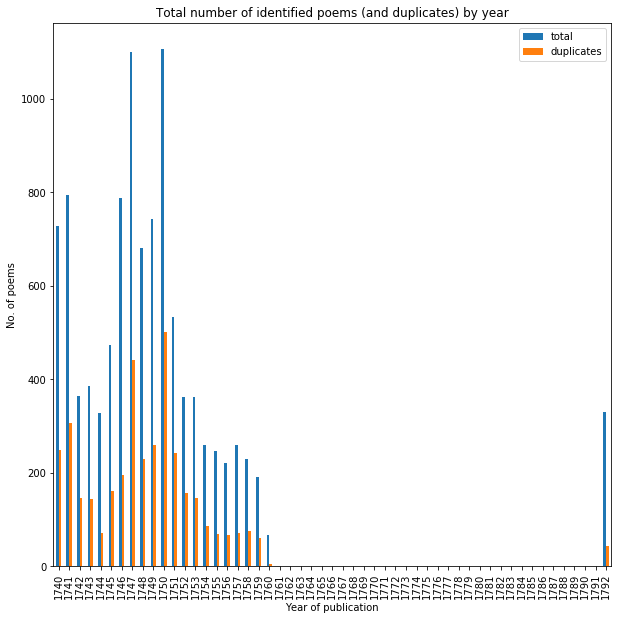

In [7]:
# counts of duplicates by the year
duplicates_by_year = df.groupby('year')['ref no'].count()

# get the date range of the data set
start_year = vp.pickle_as_single_data_frame()['year'].min()
end_year = vp.pickle_as_single_data_frame()['year'].max()

# reindex the results to include years not covered
total_by_year_reindex = total_by_year.reindex(np.arange(start_year, end_year + 1, 1))
duplicates_by_year_reindex = duplicates_by_year.reindex(np.arange(start_year, end_year + 1, 1))

# create a new data frame
df2 = pd.DataFrame({"total": total_by_year_reindex, "duplicates": duplicates_by_year_reindex})

# generate a plot
df2.plot(kind='bar', title="Total number of identified poems (and duplicates) by year", figsize=(10,10))
plot.xlabel("Year of publication")
plot.ylabel("No. of poems")
plot.show()

## Total number of identified poems by publication type

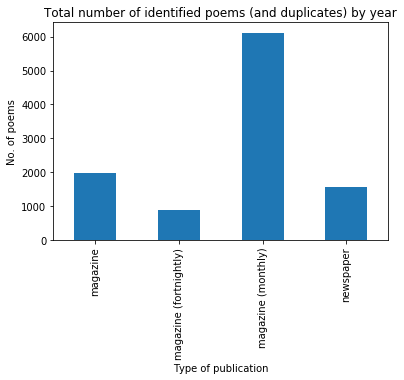

In [3]:
total_by_type = df.groupby('publication type')['first line'].count()
total_by_type.plot(kind='bar', title="Total number of identified poems (and duplicates) by year")
plot.xlabel("Type of publication")
plot.ylabel("No. of poems")
plot.show()